In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_excel('RocketLaunchDataCompleted.xlsx')
df

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,2020-05-28,NaN,Cape Canaveral,NaN,NaN,87.0,71.0,79.36,NaN,...,20.0,10.0,NaN,NaN,NaN,30.08,NaN,13:45:00,Thunder,NaN
296,NaN,2020-05-29,NaN,Cape Canaveral,NaN,NaN,86.0,72.0,79.50,NaN,...,18.0,10.0,NaN,NaN,NaN,30.05,NaN,13:46:00,Fair,NaN
297,Space X Dragon,2020-05-30,20:22:00,Cape Canaveral,Crewed,Y,87.0,75.0,79.69,80.0,...,16.0,10.0,7.0,NaN,NaN,30.03,NaN,13:47:00,Fair,Rain before launch
298,NaN,2020-05-31,NaN,Cape Canaveral,NaN,NaN,87.0,72.0,79.70,NaN,...,13.0,10.0,NaN,NaN,NaN,30.01,NaN,13:47:00,Cloudy,NaN


In [3]:
#Borrando columnmas innecesarias
df.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [5]:
#Checking Data
df.isnull().sum().sort_values(ascending=False)

Hist Ave Sea Level Pressure     300
Hist Ave Visibility             300
Hist Ave Max Wind Speed         300
Notes                           297
Temp at Launch Time             241
Time (East Coast)               241
Wind Speed at Launch Time       241
Name                            240
Crewed or Uncrewed              240
Launched?                       240
Condition                         2
Day Length                        2
Ave Temp                          1
Low Temp                          1
Sea Level Pressure                1
High Temp                         1
Visibility                        1
Max Wind Speed                    1
Wind Direction                    1
Hist Ave Percipitation            1
Hist Ave Temp                     1
Hist Low Temp                     1
Hist High Temp                    1
Percipitation at Launch Time      1
Date                              0
Location                          0
dtype: int64

In [6]:
df.drop(['Name', 'Date', 'Time (East Coast)','Location','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'], axis=1, inplace=True)

In [7]:
df.isnull().sum().sort_values(ascending=False)

Temp at Launch Time             241
Wind Speed at Launch Time       241
Crewed or Uncrewed              240
Launched?                       240
Condition                         2
High Temp                         1
Low Temp                          1
Ave Temp                          1
Hist High Temp                    1
Hist Low Temp                     1
Hist Ave Temp                     1
Percipitation at Launch Time      1
Hist Ave Percipitation            1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
dtype: int64

Text(0.5, 0, '% missing')

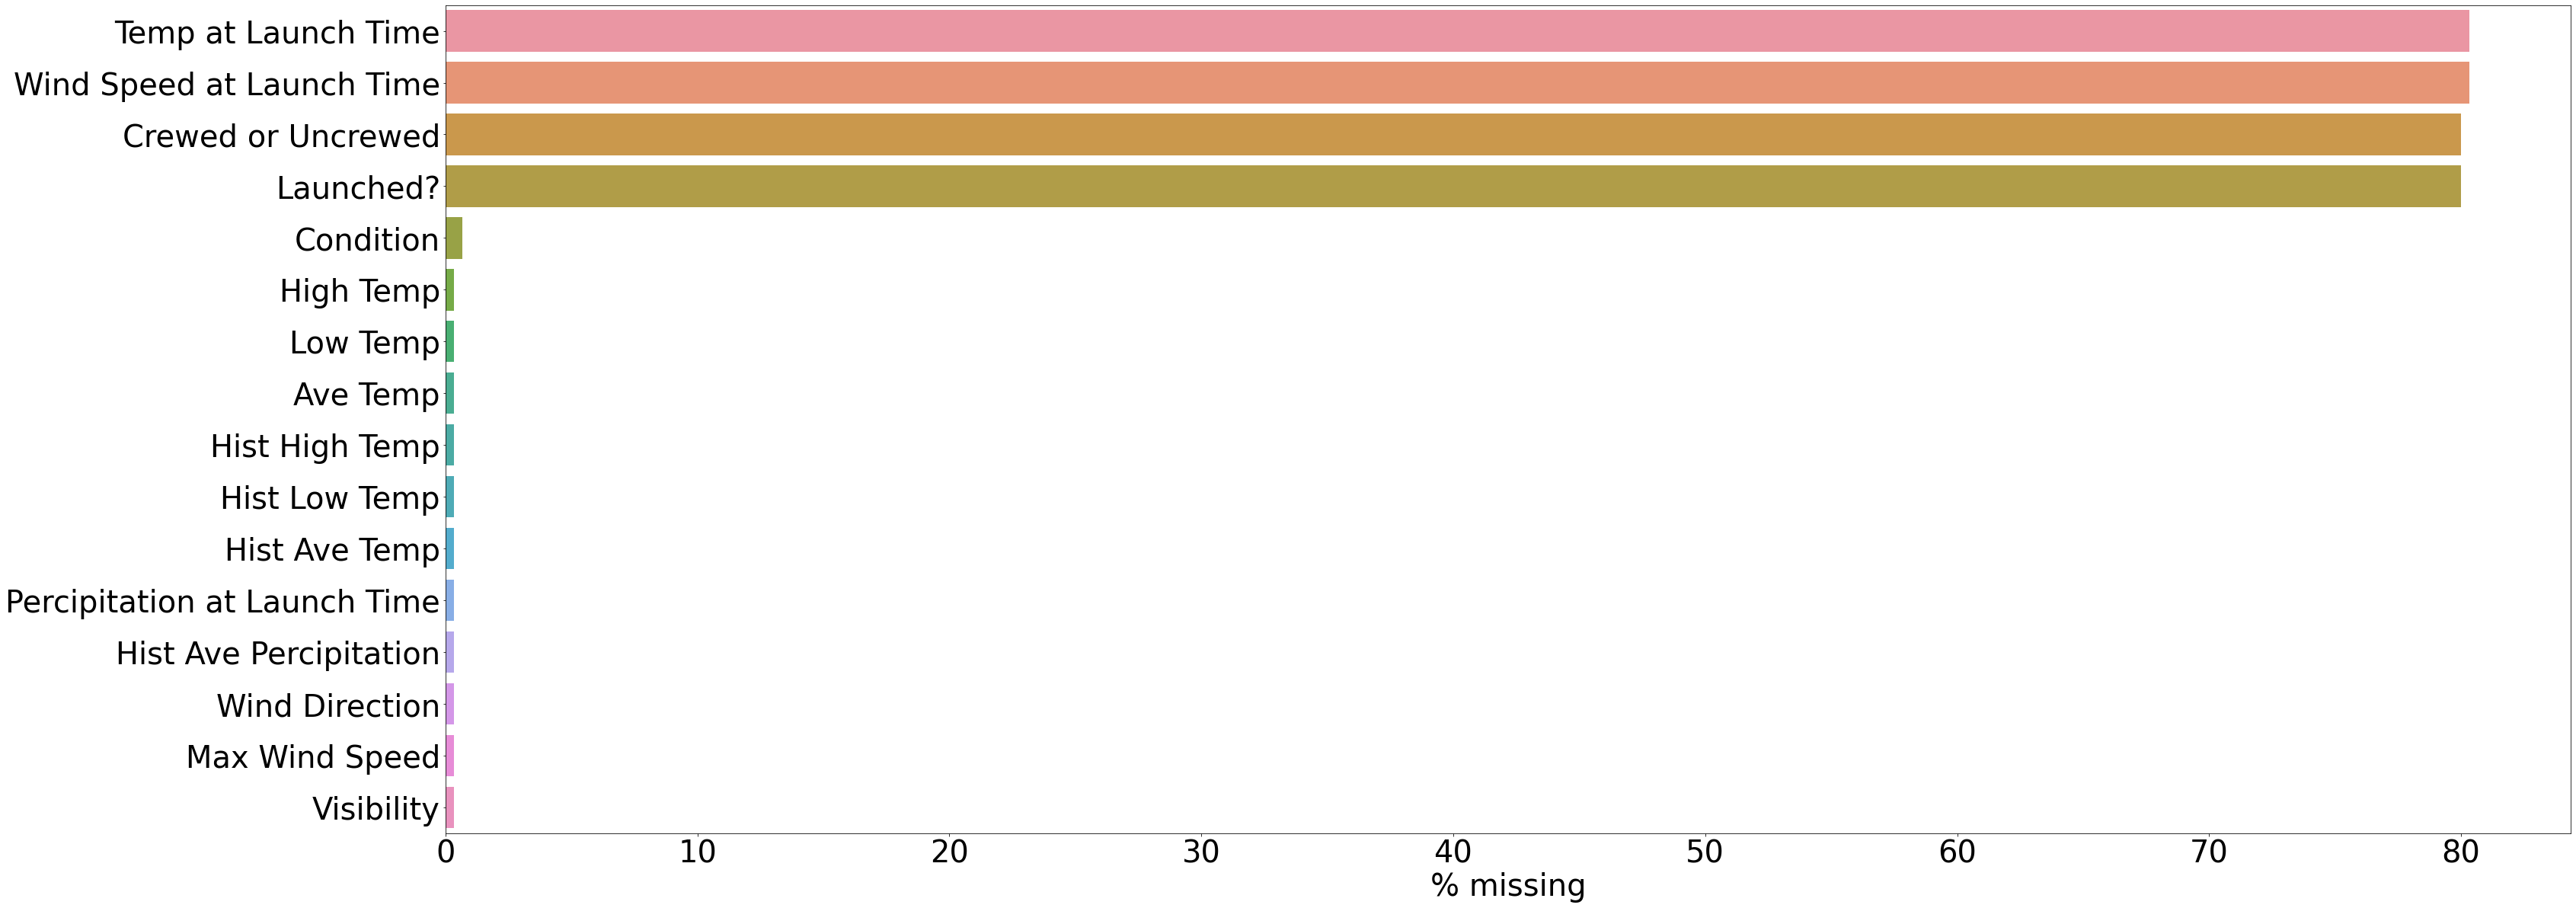

In [8]:
plt.rcParams.update({'font.size': 40})
plt.figure(figsize=(50,20))
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na==0].index).sort_values(ascending=False)
sns.barplot(y=df_na.index, x=df_na)
plt.xlabel('% missing')

In [9]:
lista = list(df.select_dtypes(['float64']).columns)
lista

['High Temp',
 'Low Temp',
 'Ave Temp',
 'Temp at Launch Time',
 'Hist High Temp',
 'Hist Low Temp',
 'Hist Ave Temp',
 'Percipitation at Launch Time',
 'Hist Ave Percipitation',
 'Max Wind Speed',
 'Visibility',
 'Wind Speed at Launch Time']

In [10]:
def replacing_data(col):
    x = df[col][~np.isnan(df[col])].mean()
    return df[col].fillna(x, inplace=True)
for i in lista:
    replacing_data(i)

In [11]:
df.isnull().sum().sort_values(ascending=False)

Crewed or Uncrewed              240
Launched?                       240
Condition                         2
Wind Direction                    1
High Temp                         0
Low Temp                          0
Ave Temp                          0
Temp at Launch Time               0
Hist High Temp                    0
Hist Low Temp                     0
Hist Ave Temp                     0
Percipitation at Launch Time      0
Hist Ave Percipitation            0
Max Wind Speed                    0
Visibility                        0
Wind Speed at Launch Time         0
dtype: int64

In [12]:
#Reemplazando Datos object NaN
df['Launched?'].fillna('N', inplace=True)
df['Crewed or Uncrewed'].fillna('Uncrewed', inplace=True)
df['Condition'].fillna('Cloudy', inplace=True)
df['Wind Direction'].fillna('E', inplace=True)

In [13]:
label_encoder = preprocessing.LabelEncoder()

df['Crewed or Uncrewed'] = label_encoder.fit_transform(df['Crewed or Uncrewed'])
df['Wind Direction'] = label_encoder.fit_transform(df['Wind Direction'])
df['Condition'] = label_encoder.fit_transform(df['Condition'])

In [14]:
df['Crewed or Uncrewed'].value_counts()
#df['Wind Direction'].value_counts()

1    284
0     16
Name: Crewed or Uncrewed, dtype: int64

In [15]:
df['Wind Direction'].value_counts()

0    81
7    54
2    42
5    38
4    28
3    25
1    19
6    13
Name: Wind Direction, dtype: int64

In [16]:
df['Condition'].value_counts()

0     115
6      68
1      68
7      24
8      12
9       7
4       2
10      1
5       1
3       1
2       1
Name: Condition, dtype: int64

In [17]:
df.columns

Index(['Crewed or Uncrewed', 'Launched?', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

In [18]:
Y = df['Launched?']
crew = df['Crewed or Uncrewed']
df.drop(['Launched?','Crewed or Uncrewed'], axis=1, inplace=True)
crew

0      1
1      1
2      1
3      1
4      1
      ..
295    1
296    1
297    0
298    1
299    1
Name: Crewed or Uncrewed, Length: 300, dtype: int32

In [19]:
from sklearn import preprocessing
df_nor = preprocessing.normalize(df)
df_final = pd.DataFrame(df_nor,columns = ['High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'])
df_final

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,0.404382,0.366639,0.382815,0.404930,0.404382,0.296547,0.350464,0.000000,0.000431,0.000000,0.086268,0.080876,0.057116,0.000000
1,0.415190,0.372606,0.390651,0.399762,0.399221,0.292762,0.345992,0.000000,0.000479,0.000000,0.074521,0.053229,0.056387,0.000000
2,0.451658,0.000000,0.372525,0.383600,0.464032,0.340290,0.402161,0.000000,0.000557,0.012374,0.092806,0.061871,0.068058,0.000000
3,0.423198,0.317398,0.367737,0.418196,0.417630,0.306262,0.361946,0.000000,0.000445,0.005568,0.055684,0.055684,0.058987,0.033410
4,0.430203,0.326736,0.384024,0.408974,0.408420,0.299508,0.353964,0.000000,0.000490,0.000000,0.065347,0.054456,0.057686,0.032674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.414909,0.338604,0.378474,0.358166,0.414909,0.333835,0.376757,0.000000,0.000715,0.019076,0.095381,0.047691,0.050520,0.042922
296,0.410046,0.343294,0.379054,0.358083,0.419582,0.333758,0.376670,0.000048,0.000763,0.023840,0.085824,0.047680,0.050508,0.004768
297,0.408940,0.352534,0.374580,0.376037,0.413640,0.329032,0.371336,0.000000,0.000752,0.023502,0.075207,0.047005,0.032903,0.004700
298,0.414701,0.343200,0.379904,0.357985,0.419467,0.333667,0.376567,0.002193,0.000763,0.000000,0.061967,0.047667,0.050494,0.000000


In [20]:
df_final.insert(0, "Crewed or Uncrewed", crew, True)

In [21]:
df_final

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,0.404382,0.366639,0.382815,0.404930,0.404382,0.296547,0.350464,0.000000,0.000431,0.000000,0.086268,0.080876,0.057116,0.000000
1,1,0.415190,0.372606,0.390651,0.399762,0.399221,0.292762,0.345992,0.000000,0.000479,0.000000,0.074521,0.053229,0.056387,0.000000
2,1,0.451658,0.000000,0.372525,0.383600,0.464032,0.340290,0.402161,0.000000,0.000557,0.012374,0.092806,0.061871,0.068058,0.000000
3,1,0.423198,0.317398,0.367737,0.418196,0.417630,0.306262,0.361946,0.000000,0.000445,0.005568,0.055684,0.055684,0.058987,0.033410
4,1,0.430203,0.326736,0.384024,0.408974,0.408420,0.299508,0.353964,0.000000,0.000490,0.000000,0.065347,0.054456,0.057686,0.032674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,0.414909,0.338604,0.378474,0.358166,0.414909,0.333835,0.376757,0.000000,0.000715,0.019076,0.095381,0.047691,0.050520,0.042922
296,1,0.410046,0.343294,0.379054,0.358083,0.419582,0.333758,0.376670,0.000048,0.000763,0.023840,0.085824,0.047680,0.050508,0.004768
297,0,0.408940,0.352534,0.374580,0.376037,0.413640,0.329032,0.371336,0.000000,0.000752,0.023502,0.075207,0.047005,0.032903,0.004700
298,1,0.414701,0.343200,0.379904,0.357985,0.419467,0.333667,0.376567,0.002193,0.000763,0.000000,0.061967,0.047667,0.050494,0.000000


In [22]:
X=df_final

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (201, 15) (201,)
Test set: (99, 15) (99,)


In [24]:
model = XGBClassifier(random_state=0).fit(X_train, y_train)
print(model)

[00:33:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


C:\Users\SOLEGA3\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [25]:
y_pred = model.predict(X_test)
y_pred[0:5]==Y[0:5]

0    True
1    True
2    True
3    True
4    True
Name: Launched?, dtype: bool

In [26]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.9292929292929293


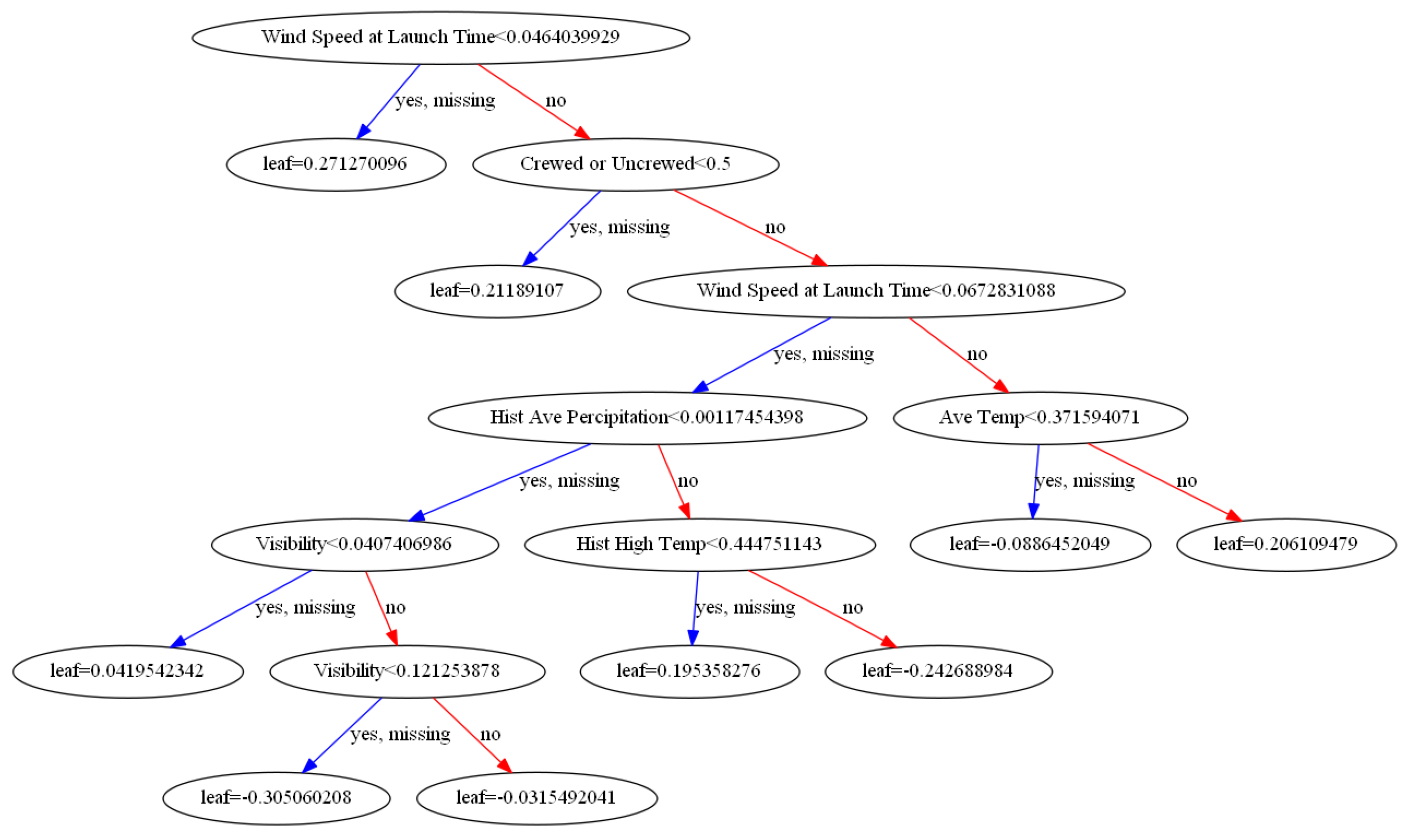

In [27]:
fig, ax = plt.subplots(figsize=(25,25))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.savefig('tree.png',format='png',bbox_inches = "tight")
plt.show()